In [145]:
import numpy as np
import pandas as pd

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [149]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [151]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [153]:
# Load the data
twitter_data = pd.read_csv("C:/Users/HP/Downloads/ATS Services- Task Project/archive/training.1600000.processed.noemoticon.csv",encoding='ISO-8859-1')

In [155]:
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [157]:
twitter_data.tail()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [159]:
twitter_data.shape

(1599999, 6)

In [258]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_12512\2047550836.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=twitter_data, x='target', palette='viridis')


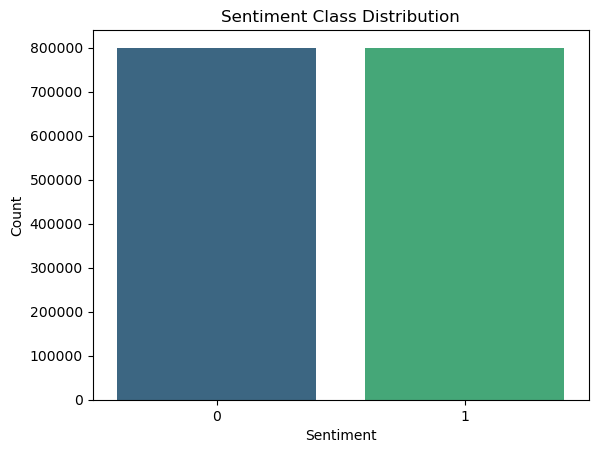

In [260]:
sns.countplot(data=twitter_data, x='target', palette='viridis')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

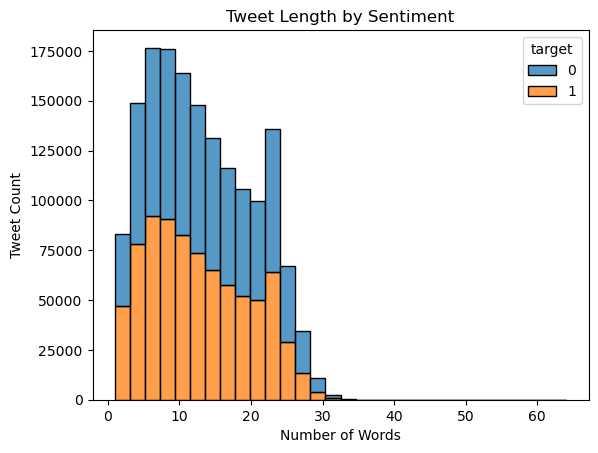

In [264]:
#ANalyze tweet length
twitter_data['tweet_lengh']=twitter_data['tweet'].apply(lambda a : len(a.split()))

sns.histplot(data=twitter_data, x='tweet_lengh', bins=30, hue='target', multiple='stack')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Number of Words')
plt.ylabel('Tweet Count')
plt.show()

In [161]:
# column naming
column_names= ['target','id','date','flag','user','tweet']
twitter_data = pd.read_csv("C:/Users/HP/Downloads/ATS Services- Task Project/archive/training.1600000.processed.noemoticon.csv",names= column_names,encoding='ISO-8859-1')

In [163]:
# again check the shape of the data
twitter_data.shape

(1600000, 6)

In [165]:
twitter_data.head()

,target,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [167]:
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
tweet     0
dtype: int64

In [169]:
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [171]:
# converting the tweets into 0 and 1
twitter_data.replace({'target' : {4:1}}, inplace=True)

In [173]:
# Check the distribution of data
twitter_data['target'].value_counts()

# here 0 means Negative tweet and 1 means Positive Tweet

target
0    800000
1    800000
Name: count, dtype: int64

Stemming : Stemming is the process of reducing words to its keywords

In [176]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '. join(stemmed_content)
    return stemmed_content

In [178]:
twitter_data['stemmed_content'] = twitter_data['tweet'].apply(stemming)

In [180]:
twitter_data.head()

,target,id,date,flag,user,tweet,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [182]:
print(twitter_data['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [184]:
print(twitter_data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [188]:
# seperating the data and label
X = twitter_data['stemmed_content'].astype(str).values
Y = twitter_data['target'].values

In [190]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [192]:
print(Y)

[0 0 0 ... 1 1 1]


In [194]:
# Splitting the training data to Test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [196]:
print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1280000,) (320000,)


In [198]:
print(X_train)

['bad feel' 'love weekend' 'littlew bit far day trip fun get muddi today'
 ... 'twitter follow reform famou peopl'
 'aria cut hand open morn say like mommi anymor'
 'charlii sweet im excit aww miss u guy today']


In [200]:
print(X_test)

['brodiejay oh im go wow mona vale real place afteral know suck mvill slow train pffft'
 'babi grow' 'paint black roll stone best' ...
 'belladonna miss good music' 'reec r know imma get'
 'ooooooohnoooooo forgot charg ipod work one sad littl bar left']


ML model dosent understand the textual data so we have to convert the string into numerical data

In [202]:
# converting  textual data  into numerical data
vectorizer = TfidfVectorizer()
# TfidfVectorizer() convert the text data into numerical data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [204]:
print(X_train)
# here 0 means words in the 1 tweet and 1 means words in the 2 tweet and so on

  (0, 31233)	0.7519171067329923
  (0, 129956)	0.6592576617698773
  (1, 241525)	0.5942540519072339
  (1, 437910)	0.8042773910733999
  (2, 237072)	0.6367700241935805
  (2, 42838)	0.2294043092907454
  (2, 128288)	0.2817039475788181
  (2, 93639)	0.16612263205577085
  (2, 416219)	0.2970321685021027
  (2, 140234)	0.2237237868613854
  (2, 145727)	0.16444046079173227
  (2, 278606)	0.48531397707654644
  (2, 411086)	0.18464287904169108
  (3, 201928)	0.524207488360723
  (3, 308910)	0.41292329558269175
  (3, 179097)	0.4788299006944713
  (3, 445747)	0.2188627839232472
  (3, 8560)	0.37668420201866026
  (3, 286683)	0.3682809811482607
  (4, 457632)	0.7604081439946883
  (4, 302738)	0.35966531233864635
  (4, 315347)	0.3291134109458034
  (4, 415818)	0.27525076285252903
  (4, 227660)	0.3291530007938817
  (5, 93639)	0.181548748438646
  :	:
  (1279996, 132233)	0.2452899533029938
  (1279996, 452298)	0.569688609447451
  (1279996, 34420)	0.41424149821985934
  (1279997, 135226)	0.3062578356465206
  (1279997, 42

In [206]:
print(X_test)

  (0, 5622)	0.3011990126277844
  (0, 53069)	0.3855937954496085
  (0, 149573)	0.10062096511841492
  (0, 177712)	0.12894291546244904
  (0, 220160)	0.1262929409556629
  (0, 272353)	0.31389655689807383
  (0, 280262)	0.4118569164941687
  (0, 298811)	0.13515991209574565
  (0, 313583)	0.336215114519969
  (0, 317487)	0.18257148054132444
  (0, 334325)	0.1834654984968235
  (0, 371823)	0.2094373271360439
  (0, 387006)	0.1617603264881936
  (0, 414670)	0.18963151083555396
  (0, 428015)	0.3406334479403277
  (0, 445807)	0.17151168445800502
  (1, 30475)	0.6048761579069399
  (1, 154446)	0.7963195549499829
  (2, 39327)	0.3345556683317226
  (2, 43578)	0.434390421943326
  (2, 306745)	0.4614836588658659
  (2, 344198)	0.45616935735592273
  (2, 384696)	0.5275602488060214
  (3, 57543)	0.7486009460984386
  (3, 218938)	0.5023157649783742
  :	:
  (319995, 451190)	0.5325229312386054
  (319996, 132075)	0.2598181210665191
  (319996, 135226)	0.47467311497462167
  (319996, 325461)	0.3837978897372257
  (319996, 358019

# Machine learning Model Training

In [209]:
# Logistic Regression

In [211]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [213]:
# Model Evaluation
# Accuracy Score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [215]:
print('Accuracy Score on the training data : ', training_data_accuracy)

Accuracy Score on the training data :  0.80239296875


In [218]:
# test model Accuracy score 
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [224]:
print("Accuracy Score on the test data : ", test_data_accuracy)

Accuracy Score on the test data :  0.77656875


Training Model Accuracy : 80.23%

Test Model Accuracy : 77.65%

In [239]:
# function to predict the sentiment
def predict_sentiment(text):
    text= re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.split()
    text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    text = [text]
    text = vectorizer.transform(text)
    sentiment = model.predict(text)
    if sentiment == 0:
        return "Negative"
    else:
        return "Positve"

In [251]:
# Testing the model
print(predict_sentiment('python is amazing'))
print(predict_sentiment('python is difficult'))

Positve
Negative


Save the trained Model

In [254]:
import pickle

In [256]:
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))